In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytywanie danych

In [46]:
df = pd.read_csv('kredyt.csv')
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Statystyki opisowe

In [31]:
print("Kształt zbioru danych:", df.shape)


print("Typy danych:")
print(df.info())

print("Statystyki opisowe:")
print(df.describe(include='all'))


Kształt zbioru danych: (614, 13)
Typy danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Statystyki opisowe:
         Loan_ID Gender Married Dependent

In [39]:
tabela_licznosci = df['Gender'].value_counts()

print(tabela_licznosci)

Gender
Male      463
Female    103
Name: count, dtype: int64


# Braki

In [32]:
print("Braki w danych:")
print(df.isnull().sum())

Braki w danych:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Postanowiłem usunąć wszystkie rekordy gdzie zmienne married,gender i self_employed są puste ponieważ nie są to zmienne numeryczne i ciężko jest je zastąpić średnią lub medianą;Zmienną Dependants wypełniłem średnią; Pozostałe braki wypełniłem odpowiednimi medianami

In [33]:
print("Przed czyszczeniem:")
print(df.shape)
# Usunięcie rzędów z brakującymi wartościami dla Married, Gender, Self_Employed
df.dropna(subset=['Married', 'Gender', 'Self_Employed'], inplace=True)

# Przekształcenie Dependents do typu float, jeśli to konieczne
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

# Uzupełnienie brakujących wartości średnią
dependents_mean = df['Dependents'].mean()
df.fillna({"Dependents":dependents_mean}, inplace=True)

loan_amount_median = df['LoanAmount'].median()
df.fillna({"LoanAmount":loan_amount_median}, inplace=True)

loan_amount_term_median = df['Loan_Amount_Term'].median()
df.fillna({"Loan_Amount_Term":loan_amount_term_median}, inplace=True)

credit_history_median = df['Credit_History'].median()
df.fillna({"Credit_History":credit_history_median}, inplace=True)

print("Po czyszczeniu:")
print(df.shape)


Przed czyszczeniem:
(614, 13)
Po czyszczeniu:
(566, 13)


# Hipotezy Badawcze:
 

## Czy osoby w związkach małżeńskich częściej otrzymują kredyt?

<Figure size 1000x600 with 0 Axes>

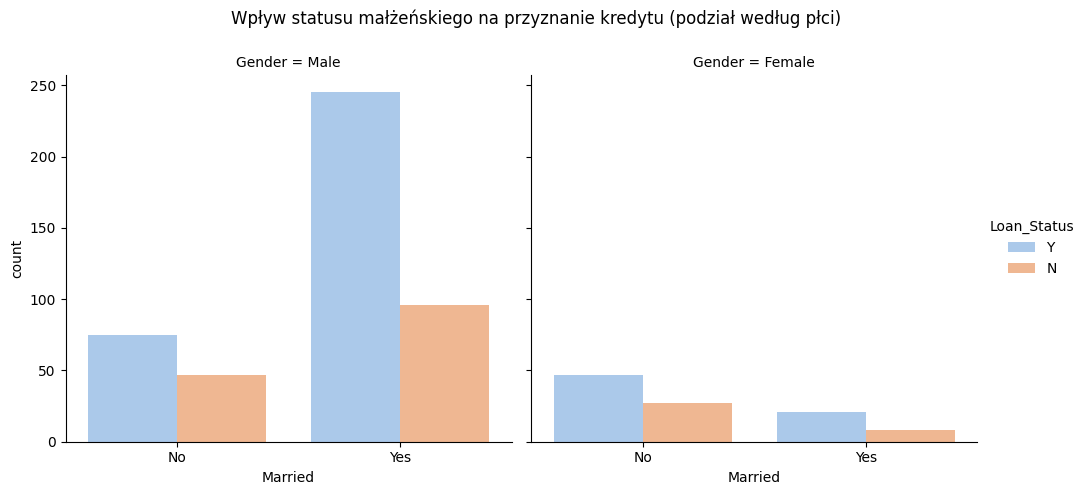

Procent zaakceptowanych wniosków według płci i statusu małżeńskiego:
Loan_Status             N          Y
Gender Married                      
Female No       36.486486  63.513514
       Yes      27.586207  72.413793
Male   No       38.524590  61.475410
       Yes      28.152493  71.847507


In [42]:
plt.figure(figsize=(10, 6))
sns.catplot(x='Married', hue='Loan_Status', col='Gender', data=df, kind='count', palette='pastel', order=['No', 'Yes'])
plt.subplots_adjust(top=0.85)
plt.suptitle("Wpływ statusu małżeńskiego na przyznanie kredytu (podział według płci)")
plt.xlabel("Married")
plt.ylabel("Liczba wniosków")
sns.despine()
plt.show()

crosstab_gender_married_loan_status = pd.crosstab(
    index=[df['Gender'], df['Married']],
    columns=df['Loan_Status'],
    normalize='index'  # Normalizacja w celu uzyskania proporcji w obrębie każdej grupy
)

# Przemnożenie przez 100, aby uzyskać wartości w procentach
crosstab_gender_married_loan_status_percent = crosstab_gender_married_loan_status * 100

print("Procent zaakceptowanych wniosków według płci i statusu małżeńskiego:")
print(crosstab_gender_married_loan_status_percent)

Na wykresie widzimy że mężczyźni w związkach małżeńskich otrzymują więcej kredytów niż ci poza nimi. Inna sytuacja ma się u kobiet gdzie kobiety poza związkami małżeńskimi częściej otrzymują kredyty. Po procentowym policzeniu zaakceptowanych kredytów widać że na ogół kobiety częściej otrzymują kredyty, nie widać tego na histogramie ponieważ rekordów z mężczyznami jest 4x więcej

## Czy osoby z wykształceniem częsciej otrzymują kredyt? Jak lokalizacja nieruchomości wpływa na to czy zostanie przynany kredyt?

<Figure size 1200x600 with 0 Axes>

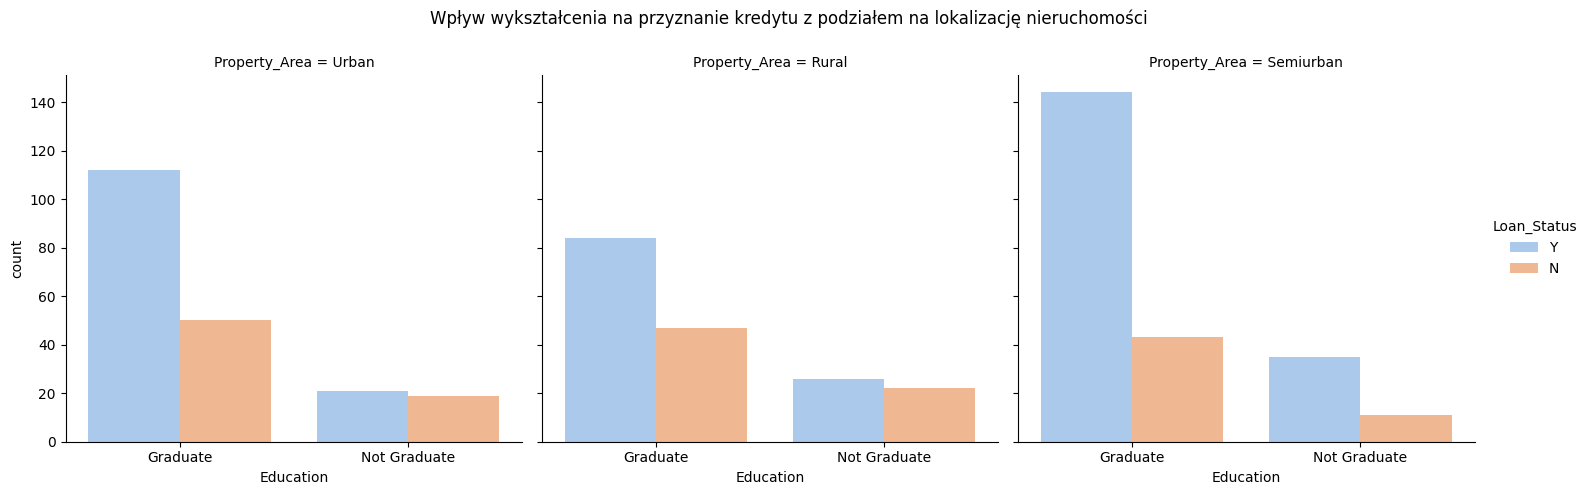

Procent zaakceptowanych wniosków według poziomu wykształcenia i lokalizacji nieruchomości:
Loan_Status                         N          Y
Property_Area Education                         
Rural         Graduate      35.877863  64.122137
              Not Graduate  45.833333  54.166667
Semiurban     Graduate      22.994652  77.005348
              Not Graduate  23.913043  76.086957
Urban         Graduate      30.864198  69.135802
              Not Graduate  47.500000  52.500000


In [51]:
plt.figure(figsize=(12, 6))
sns.catplot(x='Education', hue='Loan_Status', col='Property_Area', data=df, kind='count', palette='pastel', order=['Graduate', 'Not Graduate'])
plt.subplots_adjust(top=0.85)
plt.suptitle("Wpływ wykształcenia na przyznanie kredytu z podziałem na lokalizację nieruchomości")
plt.xlabel("Education")
plt.ylabel("Liczba wniosków")
sns.despine()
plt.show()

crosstab_education_property_loan_status = pd.crosstab(
    [df['Property_Area'], df['Education']], df['Loan_Status'], normalize='index'
) * 100
print("Procent zaakceptowanych wniosków według poziomu wykształcenia i lokalizacji nieruchomości:")
print(crosstab_education_property_loan_status)

Na podstawie wykresów i danych procentowych możemy stwierdzić że osoby wykształcone częściej otrzymują kredyty szczególnie w lokalizacjach półmiejskich

## Jak historia kredytu i liczba osob na utrzymaniu wplywa na otrzymanie kredytu? 

<Figure size 1000x600 with 0 Axes>

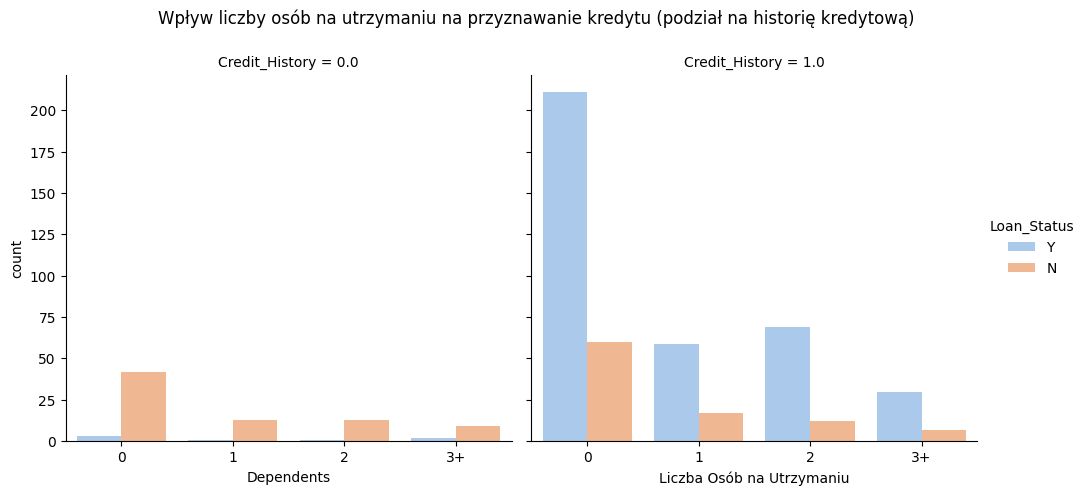

In [52]:
# Wykres pokazujący wpływ liczby osób na utrzymaniu na przyznawanie kredytu z podziałem na historię kredytową
plt.figure(figsize=(10, 6))
sns.catplot(x='Dependents', hue='Loan_Status', col='Credit_History', data=df, kind='count', palette='pastel')
plt.subplots_adjust(top=0.85)
plt.suptitle("Wpływ liczby osób na utrzymaniu na przyznawanie kredytu (podział na historię kredytową)")
plt.xlabel("Liczba Osób na Utrzymaniu")
plt.ylabel("Liczba Wniosków")
sns.despine()
plt.show()

Jak widać na wykresie na ogół osoby bez historii kredytowej nie otrzymują kredytów bez względu na ilość osób na utrzymaniu. Patrząc na drugą strone można łatwo stwierdzić że osoby bez nikogo na utrzymaniu i z historią kredytową mają największe szanse na otrzymanie kredytu.


# Podsumowanie
Na podstawie analizy i wizualizacji danych możemy wyciągnąć kilka wniosków:
1. Osoby w związkach małżeńskich wydają się częściej otrzymywać kredyt.
2. Kobiety na ogół mają większą szansę na otrzymanie kredytu
3. Osoby wykształcone dużo częściej otrzymują kredyt, najbardziej widać to na przykładzie nieruchomości w terenach półmiejskich
4. Osoby bez historii kredytowej prawie w ogóle nie otrzymują kredytów
5. Osoby bez nikogo na utrzymaniu otrzymują kredyty częściej niż osoby z innymi na utrzymaniu